In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load train and test dataset
train = pd.read_csv('train_hr.csv')

test = pd.read_csv('test_hr.csv')

In [3]:
# size of train and test dataset
print('train:', train.shape)
print('test: ', test.shape)

train: (54808, 14)
test:  (23490, 13)


In [4]:
# add source column
train['source'] = 'train'

test['source'] = 'test'

In [5]:
# combine into one dataset
data = pd.concat([train,test], ignore_index=True, sort=False)

data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


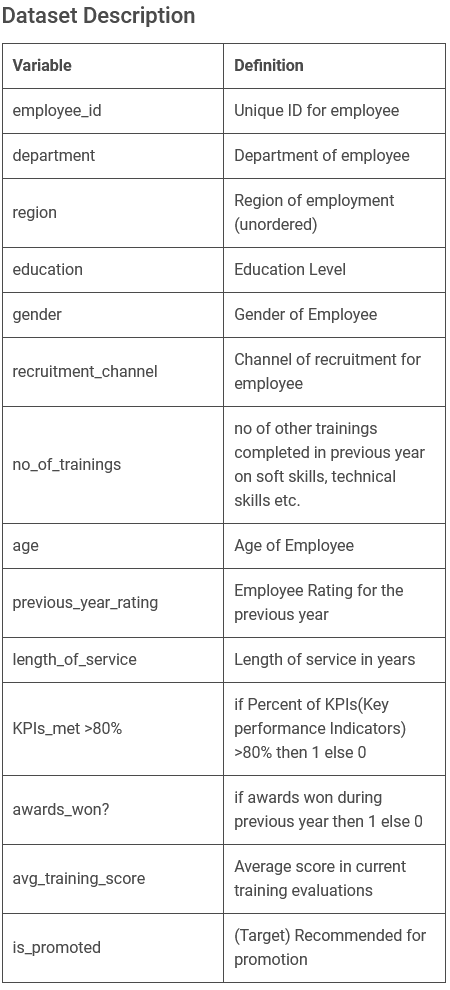

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  source                78298 non-null  object 
dtypes: float64(2), int6

In [7]:
# data types
data.dtypes.value_counts()

int64      7
object     6
float64    2
dtype: int64

In [8]:
num_var = data.select_dtypes(include=['number']).columns

num_var

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
cat_var = data.select_dtypes(include=['object']).columns

cat_var

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'source'],
      dtype='object')

In [10]:
data[['no_of_trainings', 'age', 'previous_year_rating','length_of_service','awards_won?','avg_training_score']].describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000
mean,1.253378,34.797619,3.332219,5.848974,0.023053,63.349664
std,0.606766,7.665928,1.260982,4.248070,0.150073,13.383664
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000


employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
source                   0.000000
dtype: float64

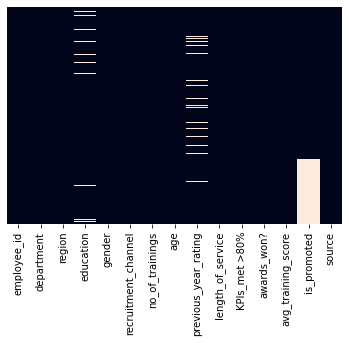

In [11]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

data.isnull().sum()/len(data)*100

- missing values on **education** and **previous_year_rating**

## EDA

In [194]:
# unique values
data.apply(lambda x:x.unique())

employee_id             [65438, 65141, 7513, 2542, 48945, 58896, 20379...
department              [Sales & Marketing, Operations, Technology, An...
region                  [region_7, region_22, region_19, region_23, re...
education               [Master's & above, Bachelor's, nan, Below Seco...
gender                                                             [f, m]
recruitment_channel                           [sourcing, other, referred]
no_of_trainings                           [1, 2, 3, 4, 7, 5, 6, 8, 10, 9]
age                     [35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 3...
previous_year_rating                       [5.0, 3.0, 1.0, 4.0, nan, 2.0]
length_of_service       [8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12...
KPIs_met >80%                                                      [1, 0]
awards_won?                                                        [0, 1]
avg_training_score      [49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 8...
is_promoted                           

In [195]:
# no. of unique values
data.apply(lambda x:x.nunique())

employee_id             78298
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
source                      2
dtype: int64

### Univariate Analysis: Numerical

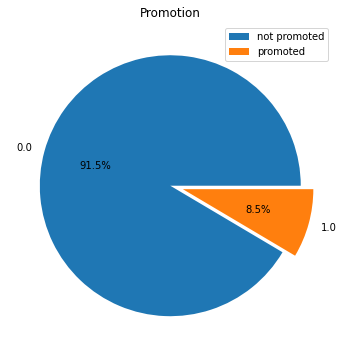

In [196]:
plt.figure(figsize=(12,6))

plt.pie(data['is_promoted'].value_counts().values,
        explode=(0,0.1),
        autopct='%0.1f%%',
        labels=data['is_promoted'].value_counts().index)

plt.title('Promotion')
plt.legend(['not promoted','promoted'])
plt.show()

- the dataset is very imbalance with only 8.5% of the data representing promoted.

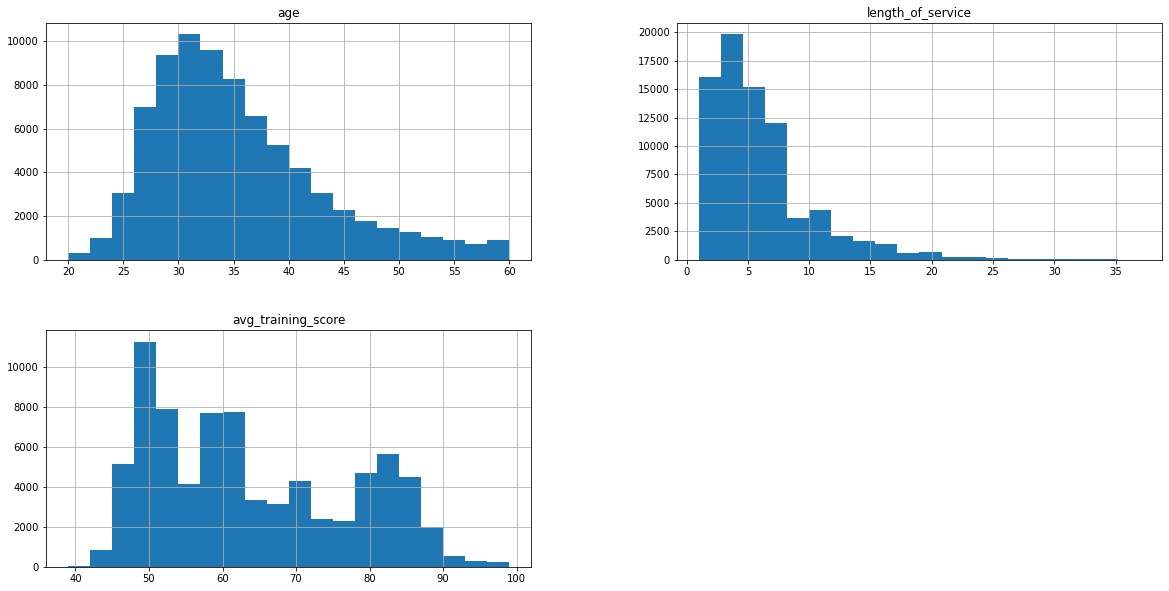

In [197]:
data[['age','length_of_service','avg_training_score']].hist(bins=20, figsize=(20,10))

plt.show()

- the average **age** of employees are between 30 to 35.
- most **length_of_service** are within the 10 years.
- there are four distinct peaks on **avg_training_score**,

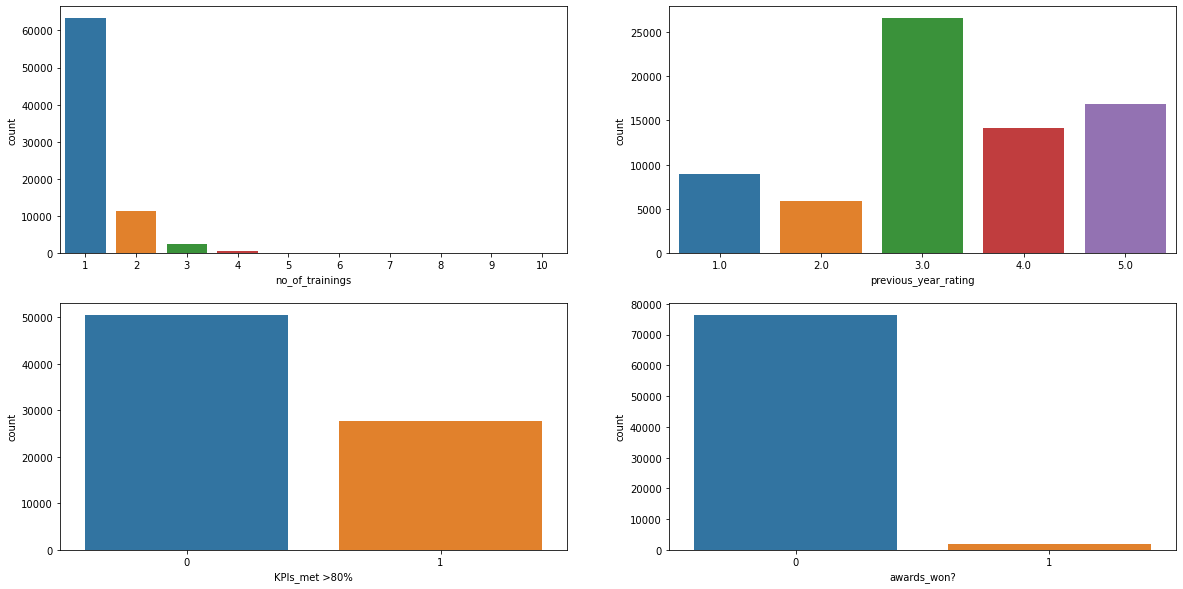

In [198]:
fig = plt.figure(figsize=(20,10))

for n, col in enumerate(['no_of_trainings', 'previous_year_rating','KPIs_met >80%','awards_won?']):
    fig.add_subplot(2,2,n+1)
    sns.countplot(x=col,data=data)

- a large **no_of_trainings** are 1.
- most employees **previous_year_rating** are 3.
- most employees do not achieve a **KPIs_met >80%**.
- a significant number of employees did not won any awards.

### Univariate Analysis: Categorical

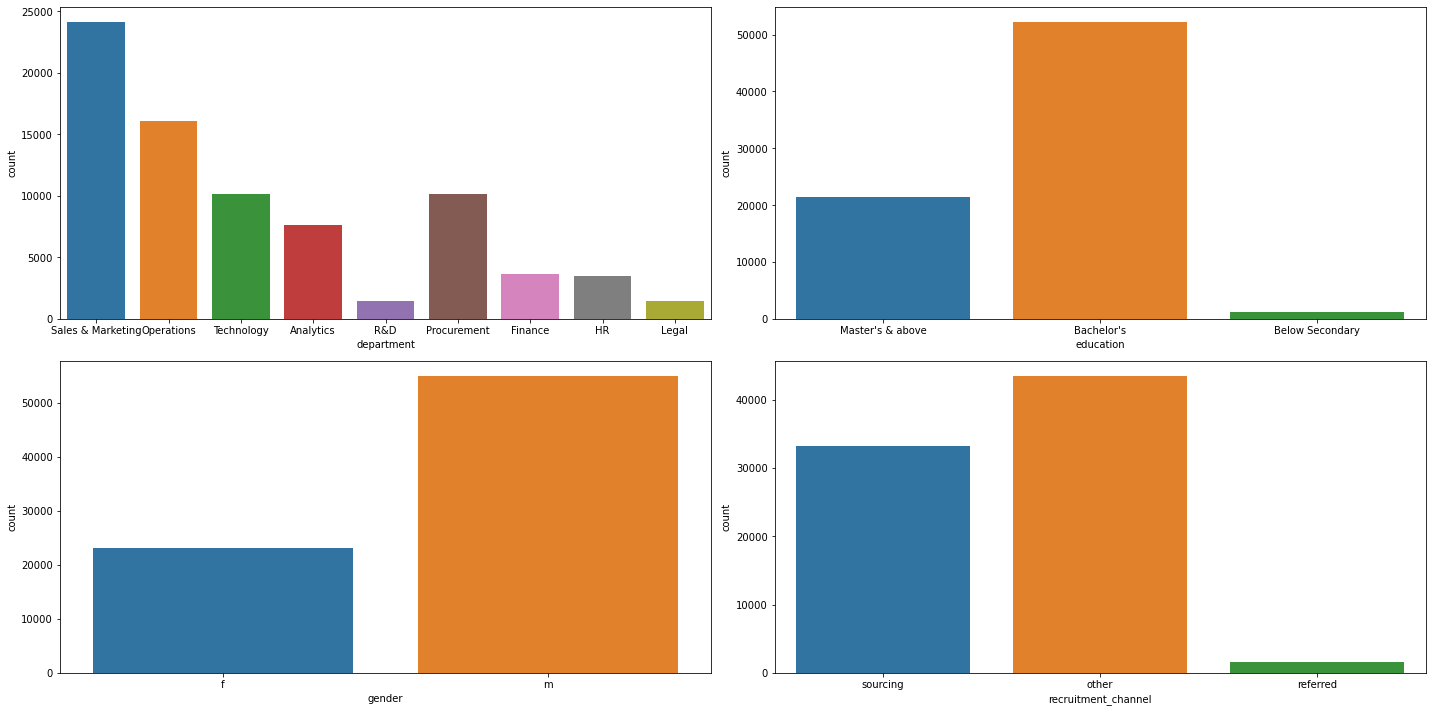

In [199]:
fig = plt.figure(figsize=(20,10))

for n, col in enumerate(cat_var.drop(['region', 'source'])):
    fig.add_subplot(2,2,n+1)
    sns.countplot(x=col,data=data)
    
plt.tight_layout()

- most employees that are considered for promotion are from the sales and marketing **department**.
- most employees have a bachelor's **education**.
- most employees are male.
- the **recruitment_channel** are mostly conduted on other or sourcing channels.

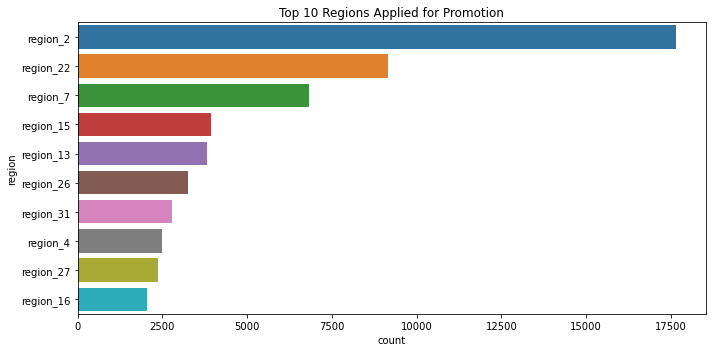

In [200]:
plt.figure(figsize=(10,5))
sns.countplot(y='region', data=data, order=data['region'].value_counts().head(10).index)

plt.title('Top 10 Regions Applied for Promotion')
plt.tight_layout()

### Bi-variate Analysis

<AxesSubplot:>

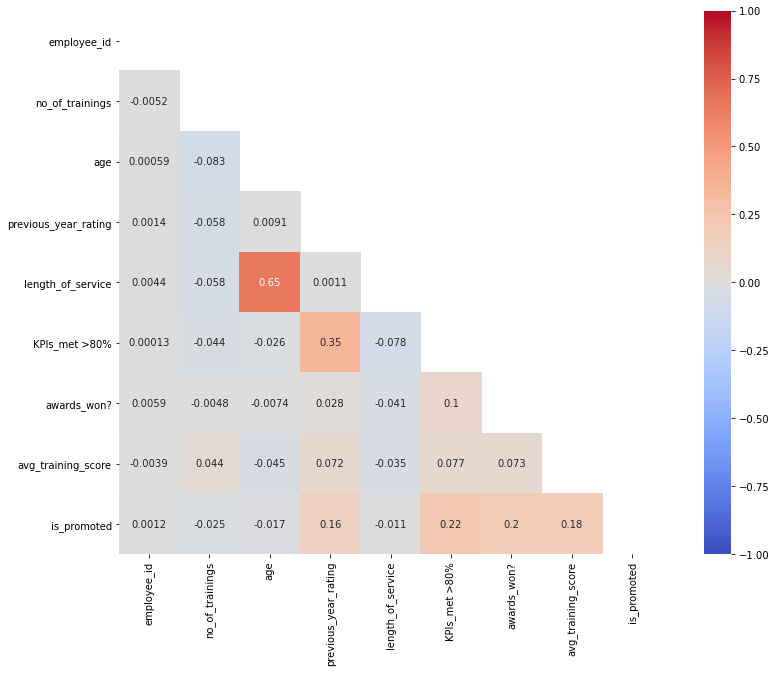

In [201]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True,
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

- there is a colinearity relationship between **age** and **length_of_service** that shows a high positive correlation.

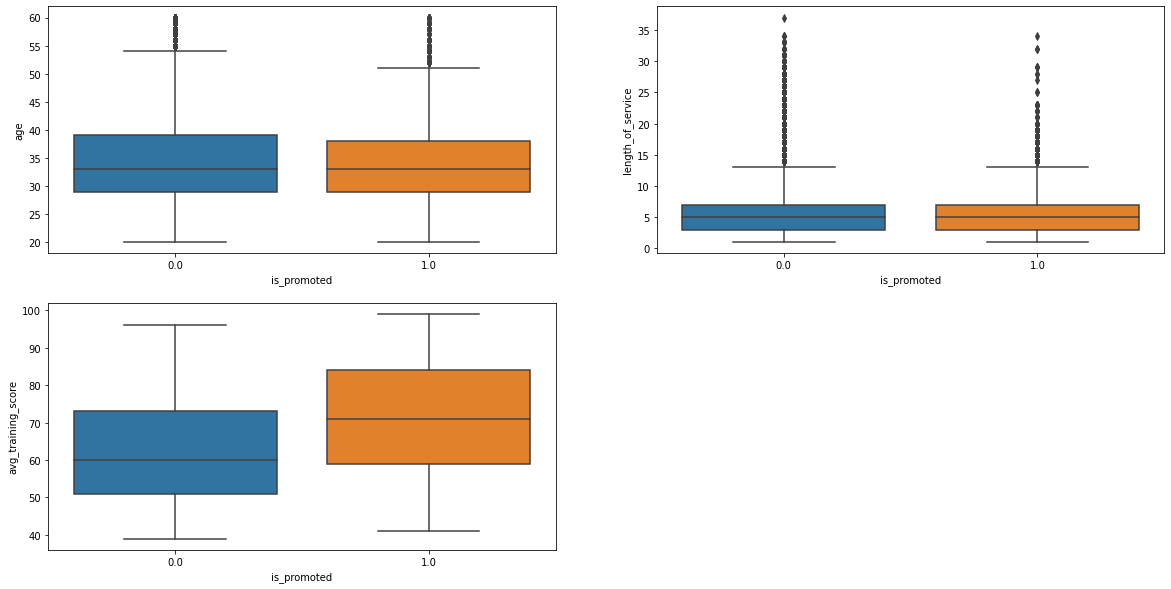

In [202]:
fig = plt.figure(figsize=(20,10))

for n, col in enumerate(['age','length_of_service','avg_training_score']):
    fig.add_subplot(2,2,n+1)
    sns.boxplot(x='is_promoted', y=col, data=data)

- the median **age** of promoted and not promoted are relitivly similar, there are some outliers too.
- the median **length_of_service** of promoted and not promoted are also similar with some outliers.
- employees with a high **avg_training_score** with a median of around 70 are usually being promoted.

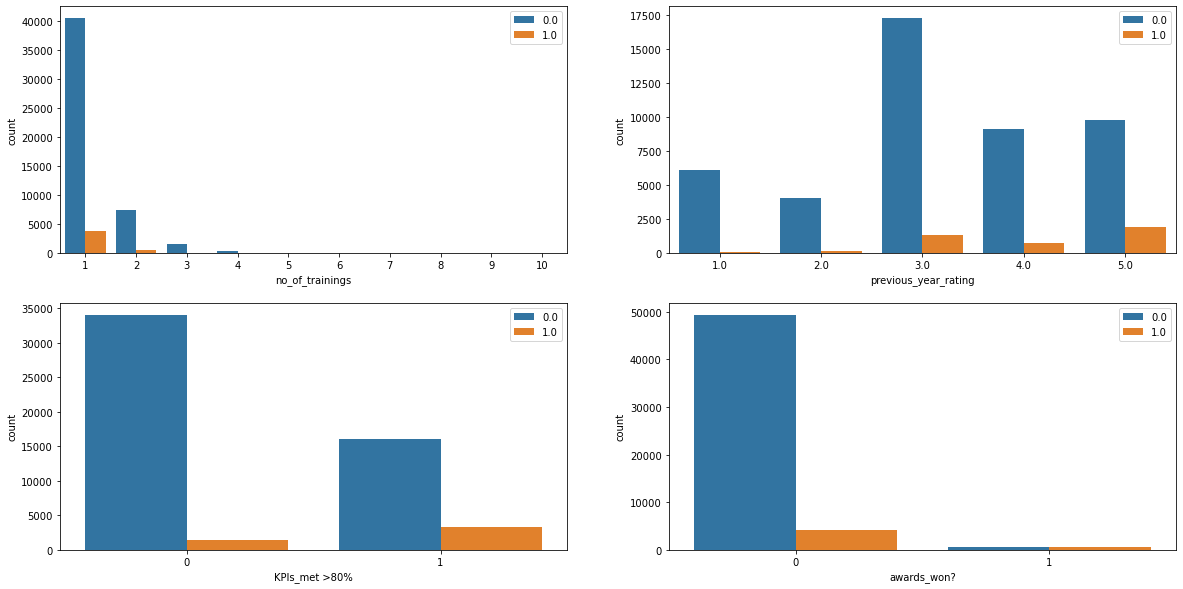

In [203]:
fig1 = plt.figure(figsize=(20,10))

for n, col in enumerate(['no_of_trainings', 'previous_year_rating','KPIs_met >80%','awards_won?']):
    fig1.add_subplot(2,2,n+1)
    sns.countplot(x=col,data=data, hue='is_promoted')
    plt.legend(loc='upper right')

- employees who have at least 1 training is considered for promotion.
- most employees with a **previous_year_rating** of 3 and above and **KPIs_met >80%** are more likely to be promoted.
- employees who are promoted usually do not have any awards won.

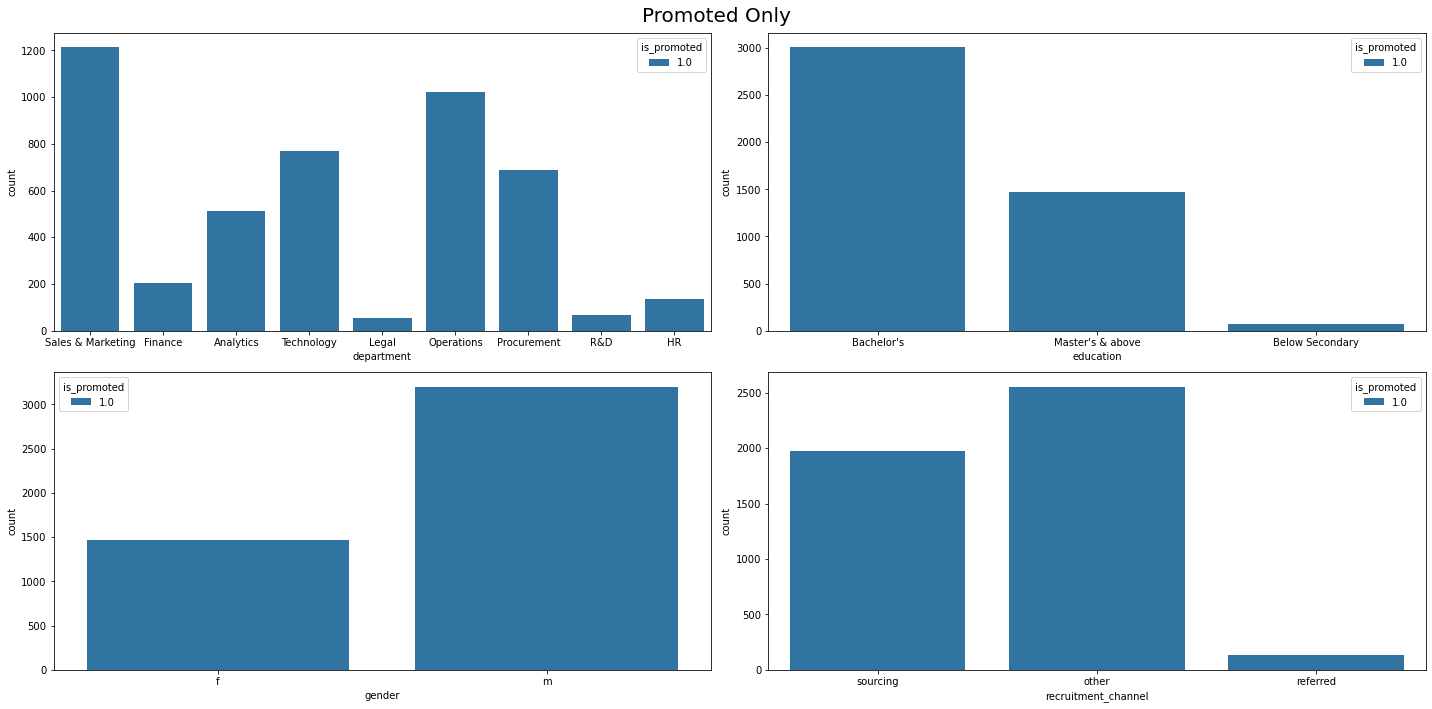

In [204]:
data_promoted = data[data['is_promoted']==1]

fig = plt.figure(figsize=(20,10))

for n, col in enumerate(cat_var.drop(['region', 'source'])):
    fig.add_subplot(2,2,n+1)
    sns.countplot(x=col,data=data_promoted, hue='is_promoted')
    
fig.suptitle('Promoted Only', size=20)
plt.tight_layout()

- employees from sales & marketing, operations and technology **department** are more likely to be promoted
- employees with an **education** of Bachelor's and Master's & above are likely to be promoted.
- most male employees are promoted compared to females
- sourcing and other **recruitment_channel** are mostly being considered for promotion.

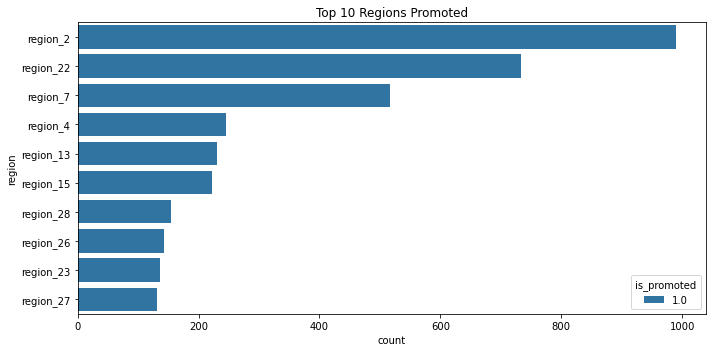

In [205]:
plt.figure(figsize=(10,5))
sns.countplot(y='region', data=data_promoted, hue='is_promoted', order=data_promoted['region'].value_counts().head(10).index)

plt.title('Top 10 Regions Promoted')
plt.tight_layout()

## Data Cleaning & Pre-processing
- there are missing values in **education** and **previous_year_rating**
- although the missing values are small, it's better to try and impute them instead of discarding them.

### Missing Values: Education

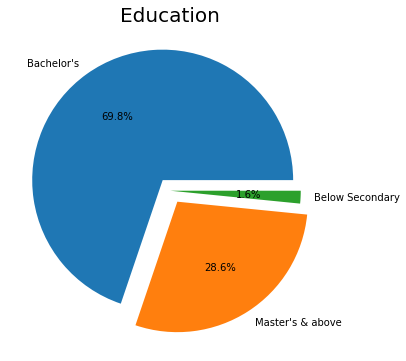

In [206]:
plt.figure(figsize=(12,6))

plt.pie(data['education'].value_counts().values,
        explode=(0.1,0.1,0),
        autopct='%0.1f%%',
        labels=data['education'].value_counts().index)

plt.title('Education', size=20)
plt.show()

- based on the statistics, Bachelor's have 69.8%, Master's & above has 28.6%, and Below Secondary have 1.6%.
- we may impute the missing values based on this statistics but let's investigate further.

In [207]:
stack_plot1 = data.groupby(['recruitment_channel', 'education']).size().reset_index().pivot(columns='education', 
                                                                                            index='recruitment_channel', 
                                                                                            values=0)

# rearrange columns
stack_plot1 = stack_plot1.reindex(columns=data['education'].value_counts().index)


stack_plot2 = data.groupby(['no_of_trainings', 'education']).size().reset_index().pivot(columns='education', 
                                                                                        index='no_of_trainings', 
                                                                                        values=0)

# rearrange columns
stack_plot2 = stack_plot2.reindex(columns=data['education'].value_counts().index)

In [208]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


https://www.codeforests.com/2020/07/18/calculate-percentage-within-group/

In [209]:
# calculate percentage within group
data.groupby(['recruitment_channel', 'education']).size()\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.reset_index().pivot(columns='education',
                     index='recruitment_channel',
                     values=0)

education,Bachelor's,Below Secondary,Master's & above
recruitment_channel,,,
other,69.410491,1.501444,29.088065
referred,77.876106,3.286979,18.836915
sourcing,69.901933,1.586100,28.511967


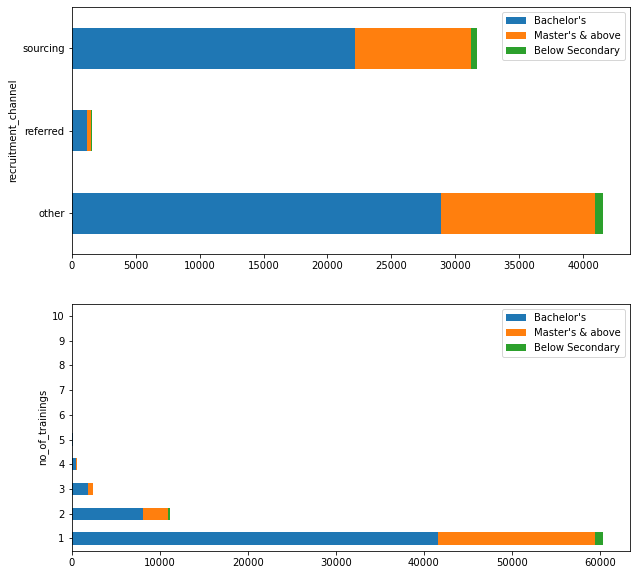

In [210]:
fig = plt.figure(figsize=(10,10))

for n, stack in enumerate([stack_plot1, stack_plot2]):
    axes = fig.add_subplot(2,1,n+1)
    stack.plot(kind='barh', stacked=True, ax=axes)
    plt.legend(loc='upper right')

- based on these two features, there is no clear pattern to differentiate the **education** classes, so for now we will try to impute the missing values with their probabilities.

In [211]:
# impute missing values with probability
def prob_edu(cols):
    prob = np.random.choice(data['education'].value_counts().index, 1, 
                                p=[0.698,0.286,0.016])
    
    if cols != "Master's & above" or "Bachelor's" or 'Below Secondary':
        return prob.item()
    else:
        return cols

In [212]:
data['education'].fillna(data['education'].apply(prob_edu), inplace=True)

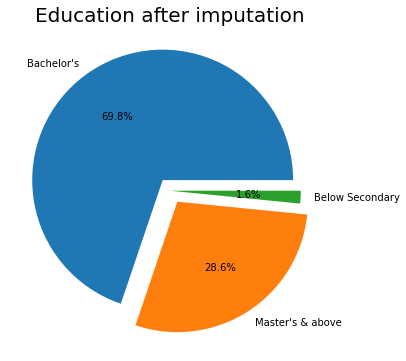

In [213]:
plt.figure(figsize=(12,6))

plt.pie(data['education'].value_counts().values,
        explode=(0.1,0.1,0),
        autopct='%0.1f%%',
        labels=data['education'].value_counts().index)

plt.title('Education after imputation', size=20)
plt.show()

### Missing Values: Previous Year Rating

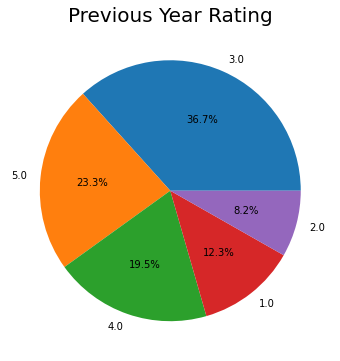

In [214]:
plt.figure(figsize=(12,6))

plt.pie(data['previous_year_rating'].value_counts().values,
        autopct='%0.1f%%',
        labels=data['previous_year_rating'].value_counts().index)

plt.title('Previous Year Rating', size=20)
plt.show()

- based on the pie chart, we can try to impute the missing values with the percentage distribution like we did in **education**
- however, let's explore further to investigate any other ways to deal with the missing values
- based on the correlation matrix, there is a strong positive correlation between **previous_year_rating** and **KPIs_met >80%**, we shall look at their relationship in-depth

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

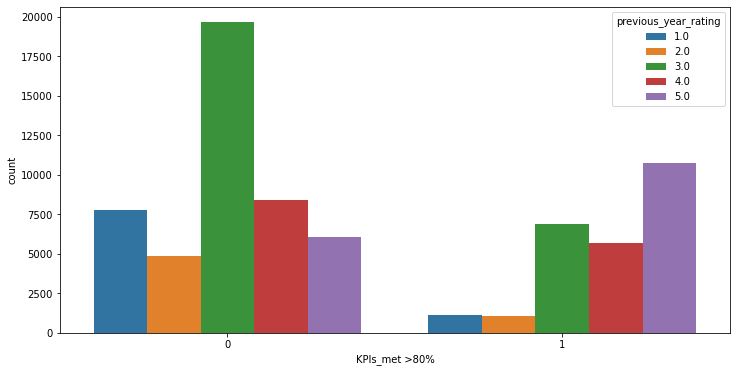

In [215]:
plt.figure(figsize=(12,6))
sns.countplot(x='KPIs_met >80%',data=data, hue='previous_year_rating')

In [216]:
data.groupby(['KPIs_met >80%', 'previous_year_rating']).size()\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.reset_index().pivot(columns='previous_year_rating',
                     index='KPIs_met >80%',
                     values=0)

previous_year_rating,1.0,2.0,3.0,4.0,5.0
KPIs_met >80%,,,,,
0,16.576075,10.398031,42.022256,18.007704,12.995934
1,4.513889,4.279806,26.927278,22.280743,41.998283


In [217]:
a = data.groupby(['KPIs_met >80%', 'previous_year_rating']).size()\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.reset_index().pivot(columns='previous_year_rating',
                     index='KPIs_met >80%',
                     values=0)

a/100

previous_year_rating,1.0,2.0,3.0,4.0,5.0
KPIs_met >80%,,,,,
0,0.165761,0.103980,0.420223,0.180077,0.129959
1,0.045139,0.042798,0.269273,0.222807,0.419983


- based on this percentage, we shall use this probability as a reference in imputing the missing values

In [218]:
np.random.choice([1.0,2.0,3.0,4.0,5.0], 1, 
                 p=[0.045139,0.042798,0.269273,0.222807,0.419983])

array([5.])

In [219]:
# impute missing values with probability
def prob_rating(cols):
    
    kpi = cols[0]
    rating = cols[1]
    
    if pd.isnull(rating):
    
        prob_zero = np.random.choice([1.0,2.0,3.0,4.0,5.0], 1, 
                                     p=[0.165761,0.103980,0.420223,0.180077,0.129959])

        prob_one = np.random.choice([1.0,2.0,3.0,4.0,5.0], 1, 
                                    p=[0.045139,0.042798,0.269273,0.222807,0.419983])
    
        if kpi == 0:
            return prob_zero.item()
        elif kpi == 1:
            return prob_one.item()
    else:
        return rating

In [222]:
data['previous_year_rating'] = data[['KPIs_met >80%','previous_year_rating']].apply(prob_rating, axis=1)

### Check Missing Values

employee_id              0.000000
department               0.000000
region                   0.000000
education                0.000000
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     0.000000
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
source                   0.000000
dtype: float64

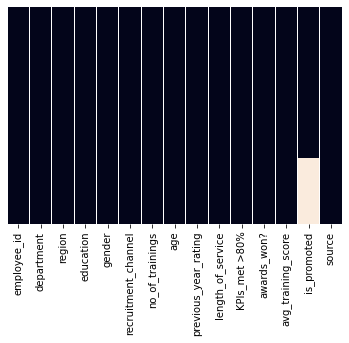

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

data.isnull().sum()/len(data)*100

In [2]:
# extract for ease of access
# data.to_csv('data_clean.csv',index=False)

# load clean version
data = pd.read_csv('data_clean.csv')

### Outliers
- there are some outliers on some of the features, we shall identify if there is a need to remove them.

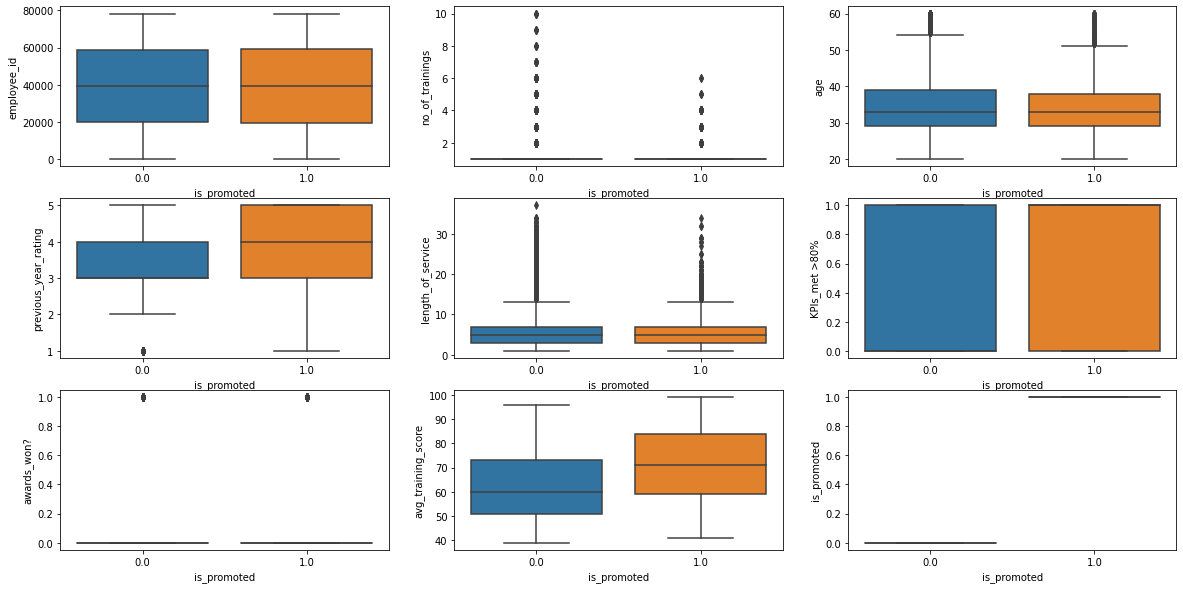

In [13]:
# recap of numerical features boxplot with only the train souce
fig = plt.figure(figsize=(20,10))

for n, col in enumerate(num_var):
    fig.add_subplot(3,3,n+1)
    sns.boxplot(x='is_promoted', y=col, data=data[data['source']=='train'])

In [14]:
# Method 1: Remove using IQR
data1 = data[data['source']=='train'].copy()

q1 = data1[['no_of_trainings', 'age', 'previous_year_rating',
            'length_of_service', 'KPIs_met >80%', 'awards_won?',
            'avg_training_score']].quantile(0.25)
q3 = data1[['no_of_trainings', 'age', 'previous_year_rating',
            'length_of_service', 'KPIs_met >80%', 'awards_won?',
            'avg_training_score']].quantile(0.75)

iqr = q3-q1

# remove
data1 = data1[~((data1<(q1-1.5*iqr))|(data1>(q3+1.5*iqr))).any(axis=1)]

removed = (len(data[data['source']=='train'])-len(data1))/100
print(f'Remove from dataset: {removed}%')

Remove from dataset: 198.57%


- a significant amout of data have been remove, which is not ideal.

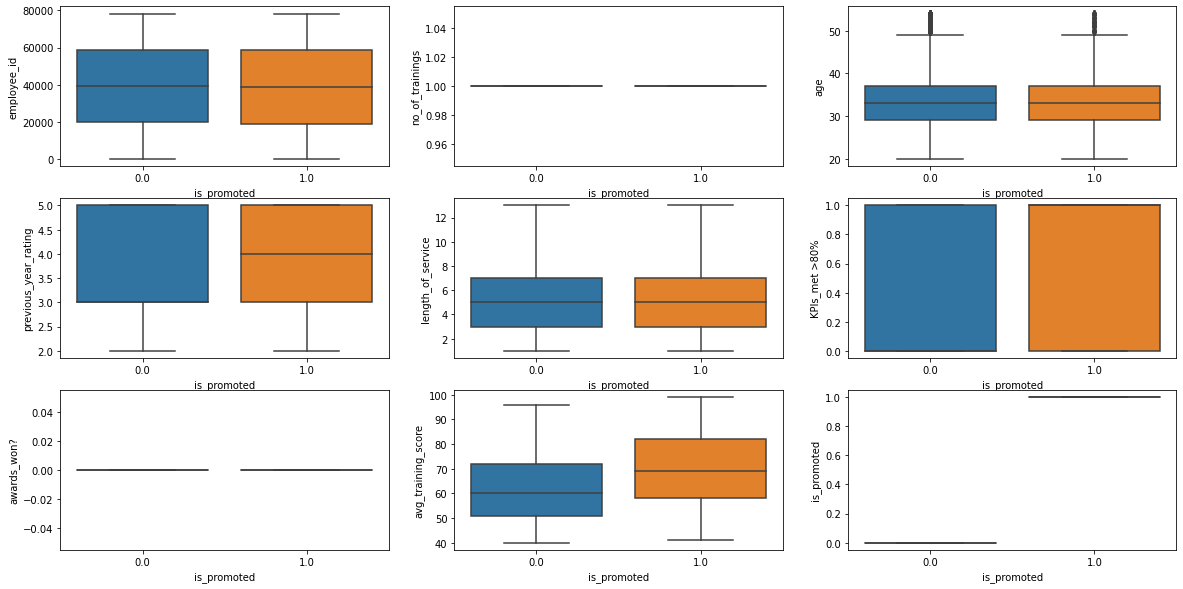

In [15]:
# after removing boxplot
fig = plt.figure(figsize=(20,10))

for n, col in enumerate(num_var):
    fig.add_subplot(3,3,n+1)
    sns.boxplot(x='is_promoted', y=col, data=data1)

In [16]:
# Method 2: Remove using Z-score
from scipy import stats

In [17]:
data2 = data[data['source']=='train'].copy()

z = np.abs(stats.zscore(data2[['no_of_trainings', 'age', 'previous_year_rating',
                               'length_of_service', 'KPIs_met >80%', 'awards_won?',
                               'avg_training_score']]))

data2 = data2[(z<3).all(axis=1)]

removed = (len(data[data['source']=='train'])-len(data2))/100
print(f'Remove from dataset: {removed}%')

Remove from dataset: 33.82%


- still a significant amount of data is remove while using this method.

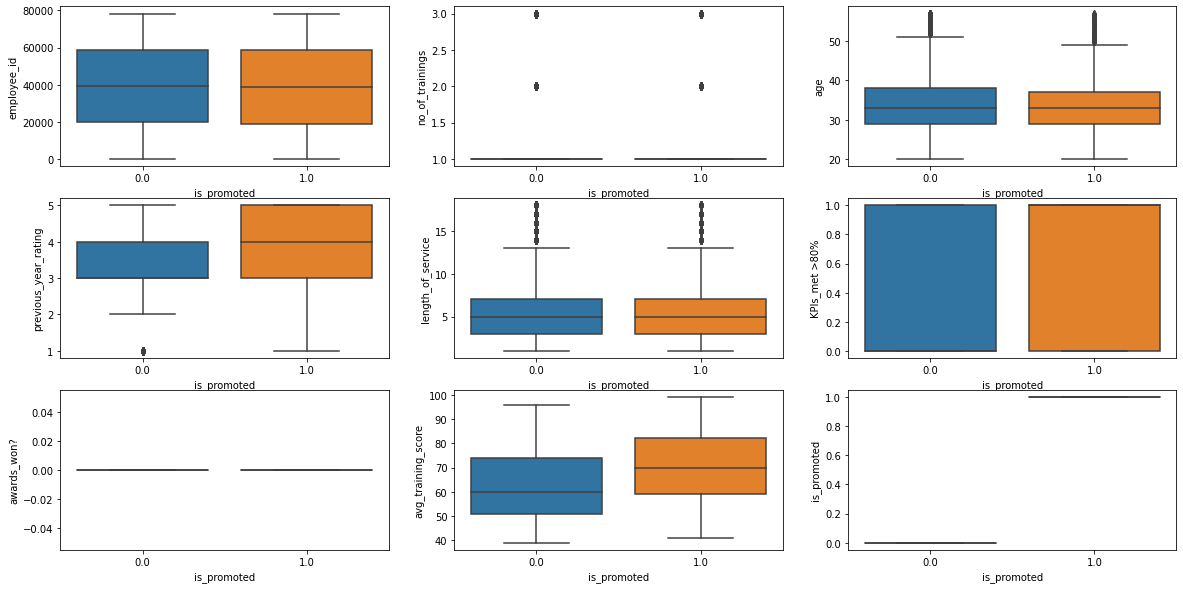

In [18]:
# after removing boxplot
fig = plt.figure(figsize=(20,10))

for n, col in enumerate(num_var):
    fig.add_subplot(3,3,n+1)
    sns.boxplot(x='is_promoted', y=col, data=data2)

- since removing the outliers using these two method yeilded a not satisfiying result and upon further analysing, we will not remove the outliers for now.

### Feature Engineering

In [3]:
# simplified region variable
data['region'] = data['region'].apply(lambda x:int(x.split('_')[1]))

### Encode Categorical Values

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
def edu_encode(cols):
    if cols == "Master's & above":
        return 0
    elif cols == "Bachelor's":
        return 1
    else:
        return 2

In [6]:
# custom label encoding
data_encode = data.copy()

data_encode['education'] = data_encode['education'].apply(edu_encode)

In [7]:
cat_one = ['department','gender','recruitment_channel']

In [8]:
# one hot encoding
data_encode = pd.get_dummies(data_encode, columns=cat_one, drop_first=True)

### Split data

In [9]:
den_train = data_encode[data_encode['source']=='train']
den_train.drop(['employee_id','source'], axis=1, inplace=True)

den_test = data_encode[data_encode['source']=='test']
den_test.drop(['employee_id','source','is_promoted'], axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = den_train.drop('is_promoted', axis=1)

y = den_train['is_promoted']

### Oversampling
- due to unbalance dataset, we will create a seperate dataset with the minority data oversampled

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
# naive approach for oversampling: balance
ros = RandomOverSampler(sampling_strategy='minority', random_state=101)

In [14]:
X_res, y_res = ros.fit_resample(X, y)

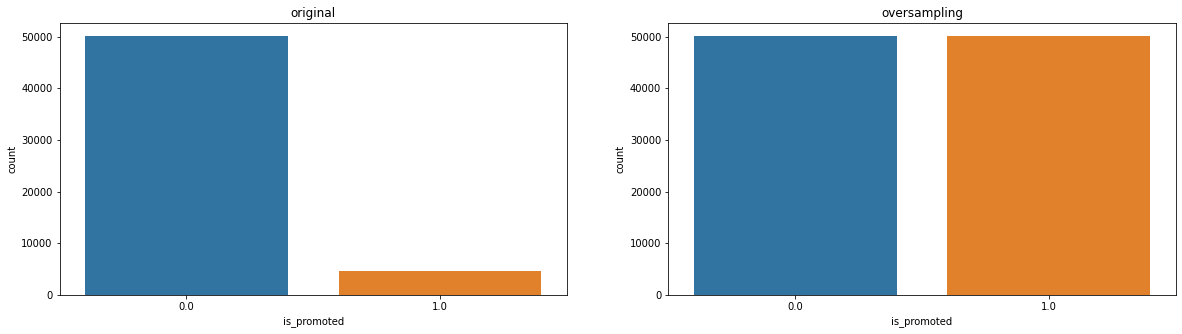

In [15]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,2,1)
sns.countplot(y)
ax1.title.set_text('original')


ax2 = fig.add_subplot(1,2,2)
sns.countplot(y_res)
ax2.title.set_text('oversampling')

In [16]:
# original with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, 
                                                    test_size=0.3, random_state=101)

# oversampling
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, shuffle=True, 
                                                                    test_size=0.3, random_state=101)

## Model Selection: Original Dataset

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [28]:
models = []

models.append(('LogReg', LogisticRegression(random_state=101)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(random_state=101)))

In [18]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [37]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.9177374722224714 (0.0014963959009016967)
LDA: 0.9330120148936742 (0.0022885131815752846)
DTC: 0.893287981600589 (0.0028526665767055967)
RFC: 0.9361136475614883 (0.002154132807312574)
KNN: 0.8822101727241177 (0.0032585766946880233)
NB: 0.8939660291389231 (0.004263681973248037)
SVM: 0.9148181990133389 (9.918875488078031e-05)


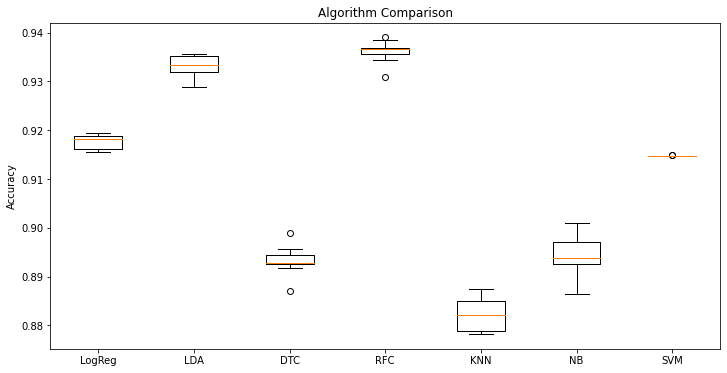

In [38]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

In [39]:
results_pred = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LogReg:
[[34827   270]
 [ 2886   382]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     35097
         1.0       0.59      0.12      0.19      3268

    accuracy                           0.92     38365
   macro avg       0.75      0.55      0.58     38365
weighted avg       0.89      0.92      0.89     38365

LDA:
[[34851   246]
 [ 2324   944]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     35097
         1.0       0.79      0.29      0.42      3268

    accuracy                           0.93     38365
   macro avg       0.87      0.64      0.69     38365
weighted avg       0.93      0.93      0.92     38365

DTC:
[[32836  2261]
 [ 1833  1435]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     35097
         1.0       0.39      0.44      0.41      3268

    accuracy                           0.89     38365
   macro avg     

- based on the accuracy score, confusion matrix and classification report, the models LDA and RFC perform well

### Parameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
def best_params_scores(model, f1):
    cv_results = pd.DataFrame(model.cv_results_)
    
    metrics_mean = ['params','mean_train_accuracy','mean_test_accuracy','mean_train_' + f1,'mean_test_' + f1]
    
    cv_results_mean = cv_results[metrics_mean]

    best_params = cv_results_mean['params']==model.best_params_
    best_scores = cv_results_mean['mean_test_' + f1]==model.best_score_
    
    df_model = cv_results_mean[(best_params) & (best_scores)]
    
    return df_model

#### LDA

In [101]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}

# use f1_micro due to imbalance of data
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_micro'], refit='f1_micro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, refit='f1_micro',
             return_train_score=True, scoring=['accuracy', 'f1_micro'])

In [102]:
grid_search.best_params_

{'solver': 'svd'}

In [103]:
grid_search.best_score_

0.9330120148936742

In [104]:
lda = grid_search

In [110]:
df_lda = best_params_scores(lda, 'f1_micro')

display(df_lda.T)

,0
params,{'solver': 'svd'}
mean_train_accuracy,0.932997
mean_test_accuracy,0.933012
mean_train_f1_micro,0.932997
mean_test_f1_micro,0.933012


#### RFC

In [117]:
# max_features sqrt(20) is 4
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.001, 0.01, 0.1], 
              'min_samples_leaf': [0.1, 1, 10], 
              'max_features': [n for n in range(1,6)]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_micro'], refit='f1_micro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [0.1, 1, 10],
                         'min_samples_split': [0.001, 0.01, 0.1],
                         'n_estimators': [1, 10, 100]},
             refit='f1_micro', return_train_score=True,
             scoring=['accuracy', 'f1_micro'])

In [118]:
grid_search.best_params_

{'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [119]:
grid_search.best_score_

0.9387723480528077

In [120]:
rfc = grid_search

In [122]:
df_rfc = best_params_scores(rfc, 'f1_micro')

display(df_rfc.T)

,389
params,"{'max_depth': 100, 'max_features': 5, 'min_sam..."
mean_train_accuracy,0.942158
mean_test_accuracy,0.938772
mean_train_f1_micro,0.942158
mean_test_f1_micro,0.938772


Text(0.5, 1.0, 'Top 5 features')

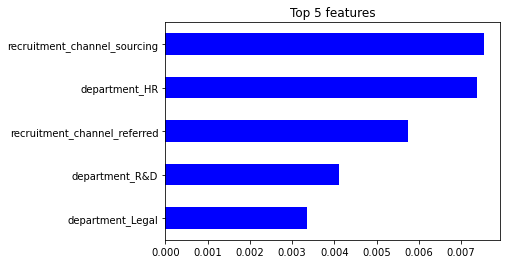

In [128]:
# get the best params feature importances
feaimp = pd.Series(rfc.best_estimator_.feature_importances_, index=X.keys()).sort_values(ascending=True)

feaimp.head().plot(kind='barh', color='blue')
plt.title('Top 5 features')

#### Save and load model
```
import joblib

# save models
joblib.dump(rfc, 'rfc.pkl')

# load models
lda = joblib.load("lda.pkl")
```

## Model Selection: Oversampling Dataset

In [47]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_res_train, y_res_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.7403840227725397 (0.004217228620971219)
LDA: 0.7600716918547095 (0.004577115833560609)
DTC: 0.9618069351037011 (0.0025207878379964036)
RFC: 0.9799418915446839 (0.0016201622841331353)
KNN: 0.9447547073084899 (0.001853444612611375)
NB: 0.6744400992990535 (0.005076368766498316)
SVM: 0.7531769060697683 (0.006132996138475806)


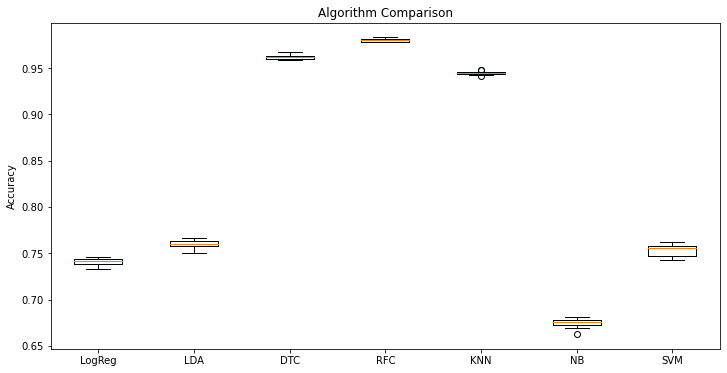

In [48]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

In [43]:
results_pred = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_res_train, y_res_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_res_train, pred_results))
    print(classification_report(y_res_train, pred_results))

LogReg:
[[25464  9553]
 [ 8639 26540]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     35017
         1.0       0.74      0.75      0.74     35179

    accuracy                           0.74     70196
   macro avg       0.74      0.74      0.74     70196
weighted avg       0.74      0.74      0.74     70196

LDA:
[[25482  9535]
 [ 7307 27872]]
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75     35017
         1.0       0.75      0.79      0.77     35179

    accuracy                           0.76     70196
   macro avg       0.76      0.76      0.76     70196
weighted avg       0.76      0.76      0.76     70196

DTC:
[[32356  2661]
 [   20 35159]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     35017
         1.0       0.93      1.00      0.96     35179

    accuracy                           0.96     70196
   macro avg     

- based on the accuracy score, confusion matrix and classification report, the models DTC, RFC and KNN perform well.
- however, due to oversampling the minority data, there might be overfitting to the model.

### Parameter Tuning
#### RFC

In [34]:
# max_features sqrt(20) is 4
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.001, 0.01, 0.1], 
              'min_samples_leaf': [0.1, 1, 10], 
              'max_features': [n for n in range(1,6)]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_micro'], refit='f1_micro',
                           return_train_score=True)

grid_search.fit(X_res_train, y_res_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [0.1, 1, 10],
                         'min_samples_split': [0.001, 0.01, 0.1],
                         'n_estimators': [1, 10, 100]},
             refit='f1_micro', return_train_score=True,
             scoring=['accuracy', 'f1_micro'])

In [35]:
grid_search.best_params_

{'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [36]:
grid_search.best_score_

0.8810756416547839

In [37]:
rfc_res = grid_search

In [39]:
df_rfc_res = best_params_scores(rfc_res, 'f1_micro')

display(df_rfc_res.T)

,389
params,"{'max_depth': 100, 'max_features': 5, 'min_sam..."
mean_train_accuracy,0.901454
mean_test_accuracy,0.881076
mean_train_f1_micro,0.901454
mean_test_f1_micro,0.881076


Text(0.5, 1.0, 'Top 5 features')

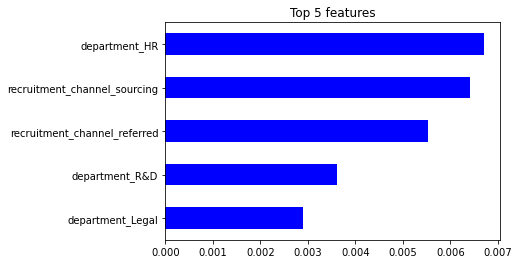

In [40]:
# get the best params feature importances
feaimp = pd.Series(rfc_res.best_estimator_.feature_importances_, index=X.keys()).sort_values(ascending=True)

feaimp.head().plot(kind='barh', color='blue')
plt.title('Top 5 features')

#### KNN

In [42]:
param_grid = {'n_neighbors':[n for n in range(1,31)]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_micro'], refit='f1_micro',
                           return_train_score=True)

grid_search.fit(X_res_train, y_res_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             refit='f1_micro', return_train_score=True,
             scoring=['accuracy', 'f1_micro'])

In [43]:
grid_search.best_params_

{'n_neighbors': 2}

In [44]:
grid_search.best_score_

0.948444346622862

In [45]:
knn_res = grid_search

In [49]:
df_knn_res = best_params_scores(knn_res, 'f1_micro')

display(df_knn_res.T)

,1
params,{'n_neighbors': 2}
mean_train_accuracy,0.999468
mean_test_accuracy,0.948444
mean_train_f1_micro,0.999468
mean_test_f1_micro,0.948444


- the mean training scores are relatively high compared to the mean testing scores, this might due to overfitting.

## Evaluation: Comparing Model
### Mean Scores

In [73]:
summary_scores = pd.concat([df_lda, df_rfc, df_rfc_res, df_knn_res], ignore_index=True)

summary_scores.rename(index={0:'lda', 1:'rfc', 2:'rfc_res', 3:'knn_res'}, inplace=True)

display(summary_scores.T)

,lda,rfc,rfc_res,knn_res
params,{'solver': 'svd'},"{'max_depth': 100, 'max_features': 5, 'min_sam...","{'max_depth': 100, 'max_features': 5, 'min_sam...",{'n_neighbors': 2}
mean_train_accuracy,0.932997,0.942158,0.901454,0.999468
mean_test_accuracy,0.933012,0.938772,0.881076,0.948444
mean_train_f1_micro,0.932997,0.942158,0.901454,0.999468
mean_test_f1_micro,0.933012,0.938772,0.881076,0.948444


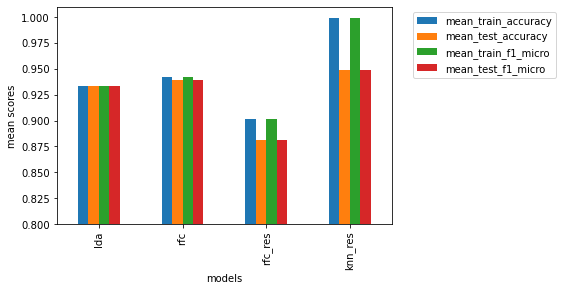

In [84]:
summary_scores.plot(kind='bar', xlabel='models', ylabel='mean scores')
plt.ylim(0.80,1.01)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

- by comparing their training and testing mean accuracy and mean f1 micro scores, RFC and LDA performs well
- the models that uses the oversampling dataset seems to be overfitting as their training scores are higher than their testing scores, especially on KNN_RES model

### Confusion Matrix & Classification Report

In [104]:
chosen_models = []

chosen_models.append(('LDA', lda.best_estimator_))
chosen_models.append(('RFC', rfc.best_estimator_))
chosen_models.append(('RFC_RES', rfc_res.best_estimator_))
chosen_models.append(('KNN_RES', knn_res.best_estimator_))

In [106]:
results_pred = []
names = []

for ix, (name, model) in enumerate(chosen_models):
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    
    if ix < 2:
        pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)
        print(f'{name}:')
        print(confusion_matrix(y_train, pred_results))
        print(classification_report(y_train, pred_results))
    else:
        pred_results = cross_val_predict(model, X_res_train, y_res_train, cv=skfold)
        print(f'{name}:')
        print(confusion_matrix(y_res_train, pred_results))
        print(classification_report(y_res_train, pred_results))

    results_pred.append(pred_results)
    names.append(name)

LDA:
[[34851   246]
 [ 2324   944]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     35097
         1.0       0.79      0.29      0.42      3268

    accuracy                           0.93     38365
   macro avg       0.87      0.64      0.69     38365
weighted avg       0.93      0.93      0.92     38365

RFC:
[[35040    57]
 [ 2292   976]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     35097
         1.0       0.94      0.30      0.45      3268

    accuracy                           0.94     38365
   macro avg       0.94      0.65      0.71     38365
weighted avg       0.94      0.94      0.92     38365

RFC_RES:
[[27904  7113]
 [ 1235 33944]]
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87     35017
         1.0       0.83      0.96      0.89     35179

    accuracy                           0.88     70196
   macro avg    

### Misclassified Areas Plot

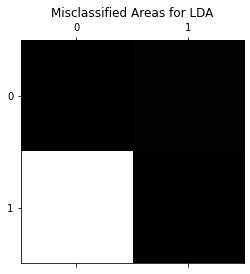

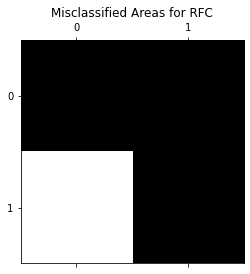

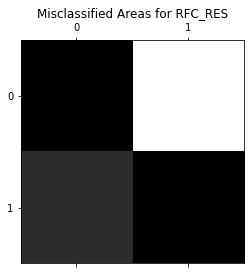

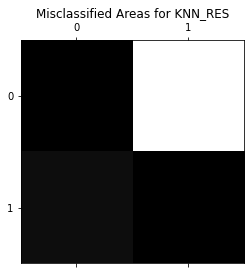

In [120]:
# plot misclassified areas
for ix, name, results in zip(range(len(names)), names, results_pred):
    if ix < 2:
        con_mat = confusion_matrix(y_train, results)
    else:
        con_mat = confusion_matrix(y_res_train, results)

    row_sums = con_mat.sum(axis=1, keepdims=True)
    norm_con_mat = con_mat / row_sums

    np.fill_diagonal(norm_con_mat, 0)
    plt.matshow(norm_con_mat, cmap=plt.cm.gray)

    plt.title(f'Misclassified Areas for {name}')
    plt.show()

## Final Model
- based on the evaluation metrics, RFC performs better than the rest, KNN_RES although yeild a good performance but the training scores show that the model is overfit.

In [20]:
rfc_model = rfc.best_estimator_

rfc_model.fit(X_train, y_train)

predict = rfc_model.predict(X_test)

In [21]:
print(f'{confusion_matrix(y_test, predict)}')
print(f'{classification_report(y_test, predict)}')

[[15015    28]
 [  962   438]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15043
         1.0       0.94      0.31      0.47      1400

    accuracy                           0.94     16443
   macro avg       0.94      0.66      0.72     16443
weighted avg       0.94      0.94      0.93     16443



- due to the imbalance in the dataset, the model was only able to predict well on 'not recommended for promotion' target which is labeled as 0
- upsampling the dataset will only make the model overfit as seen by their metric scores and this might make generalize worst with unseen data

## F1 Score on train dataset (unseen data)

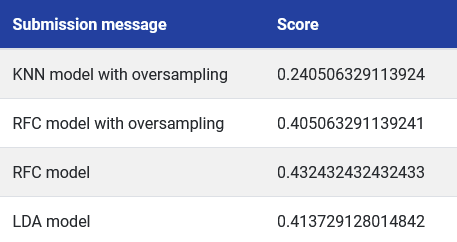

- as it shows based on the evaluation, RFC have a better F1 score when predicting with unseen data
- KNN_RES performs the worst because the model was overfit as mentioned above